In [1]:
# Creating a Handwriting Classifier... Algorithm will predict what is written if given a new image...

In [2]:
#Importing the Libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the Training Dataset...
train = pd.read_csv('train.csv')
train.head()
# Label is indicating the number printed on the photo...

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Importing the Testing Dataset...
test = pd.read_csv('test.csv')
test.head()
# Label is indicating the number printed on the photo...

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
test.shape

(28000, 784)

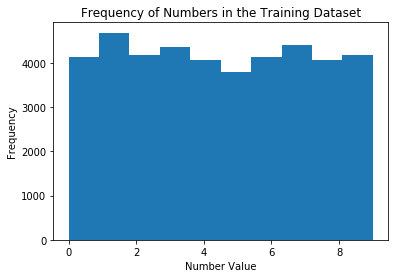

In [7]:
# Plotting the Histogram for Training Dataset...
plt.hist(train["label"])
plt.title("Frequency of Numbers in the Training Dataset")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Splitting the Training Data into X and y...
y = train.iloc[:, 0].values
y

array([1, 0, 1, ..., 7, 6, 9])

In [9]:
train = train.drop('label', axis=1)

In [10]:
train.shape

(42000, 784)

In [11]:
train = train.iloc[:, :].values

In [12]:
train.shape

(42000, 784)

In [13]:
train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
#Splitting the Dataset into Training Set and Test set...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, train_size = 0.80, random_state = 40)

In [15]:
X_train.shape

(33600, 784)

In [16]:
X_train[0]  # It shows the pixel values for all the pixels...

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 231,
       127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 230, 245,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [17]:
# Function to get the picture as per the pixels value...
def showImage(value):
    return plt.imshow(value.reshape(28, 28))   

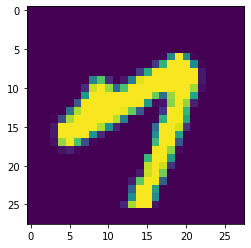

In [18]:
showImage(X_train[100])  # Checking the image for X_train[100]...

### Using the Decision Tree Classifier...

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)

In [20]:
# Fitting the Decision Tree Classifier to the Training Data...
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [21]:
def predictTreeResult(testValue):
    return tree_classifier.predict(testValue.reshape(1, 784))

In [22]:
predictTreeResult(X_test[400])

array([2])

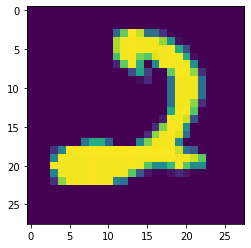

In [23]:
showImage(X_test[400])

In [24]:
y_pred = tree_classifier.predict(X_test)

In [25]:
y_pred.shape
y_test.shape

(8400,)

In [26]:
#Making the Confusion Matrix. (To get a proper understanding about the precision)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[766   2   7   5   1  10  14   3   8   5]
 [  0 854   8   9   5   2   3   6   8   4]
 [  6   6 745  15  13  13  16  20  19   5]
 [  7   3  40 736   7  56   4  11  34  15]
 [  4   2   8   5 686   5  12  10   7  52]
 [ 13   6   8  41   9 610  31   7  25  12]
 [  7   4  15   4  17  17 721   3  11   9]
 [  2   4  15   7  16   4   2 794   6  30]
 [ 12  11  20  29  24  22  15   9 621  26]
 [  5   9   8  17  45  20   6  26  26 717]]


In [27]:
from sklearn.metrics import accuracy_score
decision_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our model is: ' + str(round(decision_accuracy, 4) * 100) + ' %.')

Accuracy of our model is: 86.31 %.


In [28]:
### GINI INDEX

### Using The Random Forest Classifier... 

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 75, max_depth = 15, min_samples_leaf = 3)

In [30]:
# Fitting the Random Forest Classifier to the Training Data...
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
def predictForestResult(testValue):
    return forest_classifier.predict(testValue.reshape(1, 784))

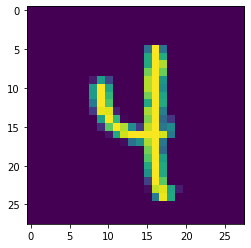

In [32]:
showImage(X_test[225])

In [33]:
predictForestResult(X_test[225])

array([4])

In [34]:
#Predicting the Test Set Results from the Training Set.
y_pred = forest_classifier.predict(X_test)

In [35]:
print(y_pred.shape)
print(y_test.shape)

(8400,)
(8400,)


In [36]:
#Making the Confusion Matrix. (To get a proper understanding about the precision)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[808   0   0   0   3   2   3   0   3   2]
 [  0 883   3   2   2   2   1   3   2   1]
 [  1   2 823   3   7   0   5   7   8   2]
 [  2   4  19 828   2  23   2  10  16   7]
 [  3   0   3   0 753   0   4   2   5  21]
 [  6   1   3   9   5 719   9   1   9   0]
 [  7   0   0   0   3   6 789   0   3   0]
 [  0   3  14   1   4   1   0 832   2  23]
 [  2   5   9   7   5   5   6   2 737  11]
 [  5   6   3  18  23   5   0   7   8 804]]


In [37]:
forest_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our model is: ' + str(round(forest_accuracy, 4) * 100) + ' %.')

Accuracy of our model is: 94.95 %.


### Using SVM

In [38]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'poly', degree = 2)

In [39]:
# Fitting the Support Vector Classifier to the Training Data...
svc_classifier.fit(X_train, y_train)

/home/prashantpk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
def predictSVCResult(testValue):
    return svc_classifier.predict(testValue.reshape(1, 784))

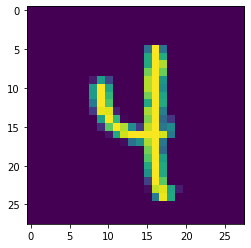

In [42]:
showImage(X_test[225])

In [43]:
predictSVCResult(X_test[225])

array([4])

In [44]:
#Predicting the Test Set Results from the Training Set.
y_pred = svc_classifier.predict(X_test)

In [45]:
#Making the Confusion Matrix. (To get a proper understanding about the precision)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[812   0   2   0   0   1   4   0   1   1]
 [  0 891   2   0   0   0   0   3   2   1]
 [  3   3 843   0   3   0   0   2   2   2]
 [  0   2  10 875   0  12   0   5   6   3]
 [  3   0   2   0 771   1   2   1   1  10]
 [  0   1   0  17   2 728  12   0   0   2]
 [  2   0   0   0   2   4 798   0   2   0]
 [  0   3   3   2   1   0   0 862   0   9]
 [  3   1   4   7   5   1   2   1 762   3]
 [  4   5   0   8  12   4   0   7   3 836]]


In [46]:
forest_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our model is: ' + str(round(forest_accuracy, 4) * 100) + ' %.')

Accuracy of our model is: 97.36 %.
